# CS4035 - Cyber Data Analytics
## Lab 4

### Submit on brightspace (zip file with the name Group_xx.zip)
This jupyter file completed with code, plots, figures and report for each question. Write the code or explanation below each sub question. For the explanations, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.

(if you used hard-to-get libraries) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 

## Group Number :

## Student 1 
### Name :
### ID :

## Student 2
### Name :
### ID :

## README

Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

In [55]:
import os
import nbformat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

In [8]:
# If this cell does not work try running ``
nb = nbformat.read("Lab4.ipynb", nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))

print("Word count:", word_count)

Word count: 259


## 1. Preparation (0 points)

### 1a. Load the dataset and split it into a train and test set

In [13]:
data_X_path = os.path.join(os.getcwd(), "data", "X.npy")
data_y_path = os.path.join(os.getcwd(), "data", "y.npy")
features_path = os.path.join(os.getcwd(), "data", "feature_names.csv")

X = np.load(data_X_path)
y = np.load(data_y_path)

df_feats = pd.read_csv(features_path)

In [67]:
X.shape

(30396, 22761)

In [66]:
data = np.c_[X, y]
data.shape

(30396, 22762)

In [20]:
features = df_feats['feature_name'].tolist()
features.append('label')
df = pd.DataFrame(data=data, columns=features)
df

,kernel32.dll:SetFileTime,kernel32.dll:CompareFileTime,kernel32.dll:SearchPathW,kernel32.dll:GetShortPathNameW,kernel32.dll:GetFullPathNameW,kernel32.dll:MoveFileW,kernel32.dll:SetCurrentDirectoryW,kernel32.dll:GetFileAttributesW,kernel32.dll:GetLastError,kernel32.dll:CreateDirectoryW,...,msvcrt.dll:_wrmdir,wsock32.dll:ntohl,msvcr100.dll:_ismbblead,msvcr100.dll:_acmdln,secur32.dll:LsaFreeReturnBuffer,gdiplus.dll:GdipEmfToWmfBits,gdiplus.dll:GdipAddPathLine2,gdiplus.dll:GdipGetRegionBoundsI,gdiplus.dll:GdipSetPenLineJoin,label
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30391,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30392,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
30393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30394,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
split_data = train_test_split(X, y, test_size=0.5, random_state=42)
X_train, X_test, y_train, y_test = split_data

## 2. Attacking linear models (5 Points)

### 2a. Implementing useless import attacks

#### Training regular SGD Classifier

-- Epoch 1
Norm: 153.14, NNZs: 9524, Bias: 6.703706, T: 13678, Avg. loss: 16.234338
Total training time: 0.86 seconds.
-- Epoch 2
Norm: 97.50, NNZs: 9567, Bias: 5.755941, T: 27356, Avg. loss: 3.029787
Total training time: 1.75 seconds.
-- Epoch 3
Norm: 72.67, NNZs: 9567, Bias: 3.221500, T: 41034, Avg. loss: 1.702662
Total training time: 2.64 seconds.
-- Epoch 4
Norm: 60.03, NNZs: 9567, Bias: 2.690504, T: 54712, Avg. loss: 1.176051
Total training time: 3.58 seconds.
-- Epoch 5
Norm: 52.88, NNZs: 9567, Bias: 2.226464, T: 68390, Avg. loss: 0.878132
Total training time: 4.40 seconds.
-- Epoch 6
Norm: 47.05, NNZs: 9567, Bias: 1.919521, T: 82068, Avg. loss: 0.724243
Total training time: 5.24 seconds.
-- Epoch 7
Norm: 42.62, NNZs: 9567, Bias: 2.074402, T: 95746, Avg. loss: 0.621178
Total training time: 6.06 seconds.
Convergence after 7 epochs took 6.09 seconds


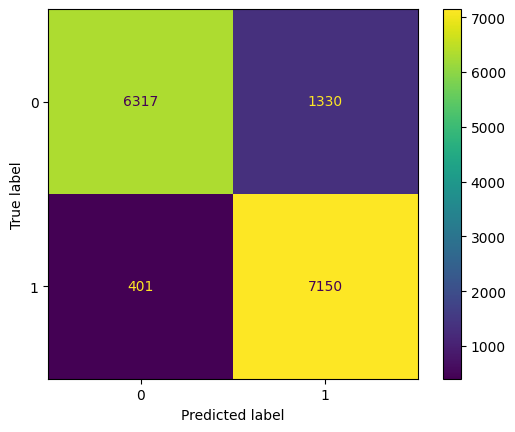

In [32]:
sgd_clf = SGDClassifier(loss="log_loss", early_stopping=True, n_jobs=-1, verbose=1)
sgd_clf.fit(X_train, y_train)
y_pred = sgd_clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [60]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()

accuracy_regular = accuracy_score(y_test, y_pred)
print('True Positive:', tp)
print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print("Accuracy:", accuracy_regular)

True Positive: 7150
True Negative: 6317
False Positive: 1330
False Negative: 401
Accuracy: 0.8861034346624556


#### Applying evasion attack on the SGD Classifier

In [40]:
def evade(sample: np.ndarray, coef: np.ndarray) -> np.ndarray:
    """Applies an evation attack where when a coefficient is negative,
    change the sample's value for that index to 1.

    Args:
        sample (np.ndarray): data saples of 0s and 1s
        coef (np.ndarray): coefficient values of the originally trained model.

    Returns:
        np.ndarray: evasion attack sample
    """
    sample_copy = sample.copy()
    mask = coef < 0
    sample_copy[mask] = 1
    return sample_copy

In [51]:
malicious_indices = np.where(y_test == 1)[0]
X_test_evaded = X_test.copy()

coef_arr = sgd_clf.coef_[0]

for i in range(len(X_test_evaded)):
    if y_test[i] == 1:
        X_test_evaded[i] = evade(X_test_evaded[i], coef_arr)
X_test_evaded

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int8)

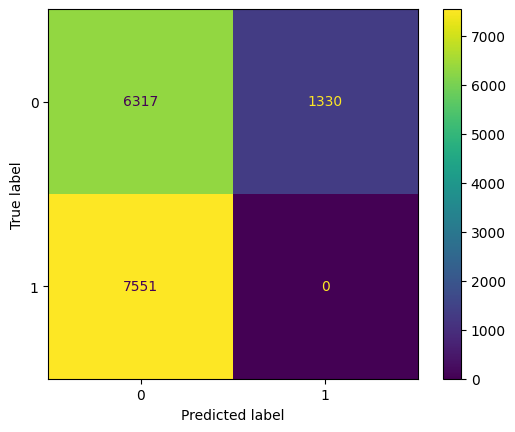

In [53]:
y_pred_evaded = sgd_clf.predict(X_test_evaded)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_evaded)
plt.show()

In [61]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_evaded, labels=[0, 1]).ravel()


accuracy_evaded = accuracy_score(y_test, y_pred_evaded)
print('True Positive:', tp)
print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print("Accuracy:", accuracy_evaded)

True Positive: 0
True Negative: 6317
False Positive: 1330
False Negative: 7551
Accuracy: 0.4156467956310041


In [65]:
drop = 1.0 - (accuracy_evaded / accuracy_regular)
drop * 100

53.09274522907849

### 2b. Analysis and answers to the questions

For the AdvML dataset, we gave a balanced split of 50/50, just like the original paper. We implemented the `evade` function such that when the coefficient is negative, we change the position in the sample to 1.

From the performed experiments, we can see that the classifier is not robust against such attacks as the accuracy has dropped by ~53% and has accuracy of ~41.5%. The model could not detect any True Positives (malicious in prediction and reality). The malicious files started not being caught and hence were moved to the False Negative category. This is because neural networks are susceptible to small changes not present in the original dataset. It could not have seen these, and it is unreasonable to ask for it to learn 2<sup>22761</sup> combinations.

## 3. Improving robustness by hardening (5 Points)

### 3a. Implementing hardening

In [73]:
malicious_indices = np.where(y_test == 1)[0]
X_train_harden = np.zeros((len(malicious_indices), X_train.shape[1]))
y_train_harden = np.ones(len(malicious_indices))

for i, idx in enumerate(malicious_indices):
    X_train_harden[i] = evade(X_train[idx], coef_arr)

In [75]:
sgd_clf = SGDClassifier(loss="log_loss", early_stopping=True, n_jobs=-1, verbose=1)
sgd_clf.fit(X_train, y_train)
sgd_clf.partial_fit(X_train_harden, y_train_harden)

-- Epoch 1
Norm: 151.49, NNZs: 9356, Bias: 14.095821, T: 13678, Avg. loss: 15.428381
Total training time: 0.82 seconds.
-- Epoch 2
Norm: 97.07, NNZs: 9357, Bias: 6.293993, T: 27356, Avg. loss: 3.006189
Total training time: 1.68 seconds.
-- Epoch 3
Norm: 72.79, NNZs: 9357, Bias: 4.488719, T: 41034, Avg. loss: 1.714505
Total training time: 2.55 seconds.
-- Epoch 4
Norm: 60.01, NNZs: 9357, Bias: 3.826027, T: 54712, Avg. loss: 1.169300
Total training time: 3.41 seconds.
-- Epoch 5
Norm: 51.88, NNZs: 9357, Bias: 2.979130, T: 68390, Avg. loss: 0.854767
Total training time: 4.28 seconds.
-- Epoch 6
Norm: 45.63, NNZs: 9357, Bias: 2.734280, T: 82068, Avg. loss: 0.725266
Total training time: 5.15 seconds.
-- Epoch 7
Norm: 41.68, NNZs: 9357, Bias: 2.351798, T: 95746, Avg. loss: 0.621231
Total training time: 6.04 seconds.
-- Epoch 8
Norm: 38.36, NNZs: 9357, Bias: 1.821715, T: 109424, Avg. loss: 0.509571
Total training time: 7.02 seconds.
-- Epoch 9
Norm: 35.43, NNZs: 9357, Bias: 2.221883, T: 12310

SGDClassifier(early_stopping=True, loss='log_loss', n_jobs=-1, verbose=1)

#### Test w/o evasion

True Positive: 7541
True Negative: 848
False Positive: 6799
False Negative: 10
Accuracy: 0.5519805237531255


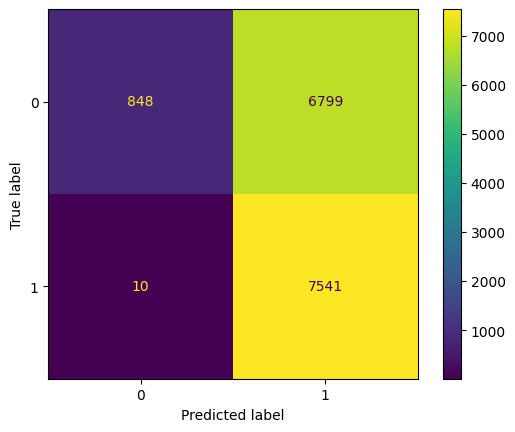

In [76]:
y_pred = sgd_clf.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()
print('True Positive:', tp)
print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print("Accuracy:", accuracy_score(y_test, y_pred))

plt.show()

#### Test with evasion 

True Positive: 7551
True Negative: 848
False Positive: 6799
False Negative: 0
Accuracy: 0.5526385050664561


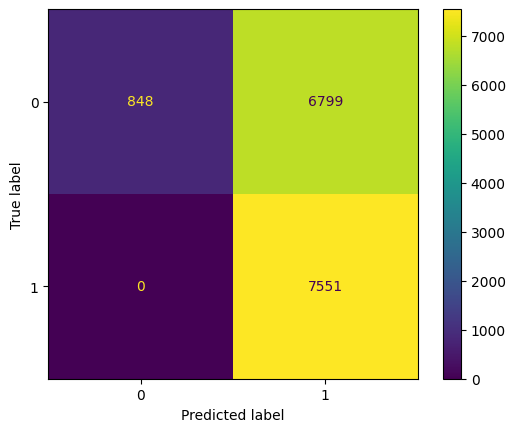

In [77]:
y_pred_evaded = sgd_clf.predict(X_test_evaded)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_evaded)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_evaded, labels=[0, 1]).ravel()
print('True Positive:', tp)
print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print("Accuracy:", accuracy_score(y_test, y_pred_evaded))

plt.show()

### 3b. Analysis and answers to the questions

After applying evation to the train dataset, we can see that the regular test accuracy dropped to ~55.2% from ~88.6% while on the evaded dataset, the increased to ~55.3% compared to ~41.6% before. Also, as we can see in the regular test, we reduced the False Negatives to very small amount (10 samples) and for evation test, we decreased them to 0 False Negatives. This means that by adding evation attacks attacks help to improve the accuracy very slightly and catch all or most of the malitious files. However, as seen in this methods decreases the precision significantly which means that a lot of benign samples are classified as malitious. In practice, this would mean that there would be a lot of false alarms being raised which contributes to the Cyber-Security Analyst's alert fatigue.

## 4. Training non-negative linear models (5 Points)

### 4a. Implement non-negative logistic regression using SGD

### 4b. Analysis and answers to the questions.

## 5. Bonus: robust decision trees for fraud detection (5 Points)

### 5a. Train and analyze a regular decision tree for fraud detection

### 5b. Train and analyze a robust decision tree (GROOT) for fraud detection

### 5c. Evaluate the robustness of the two models